In [1]:
import pymc as pm
import numpy as np
import arviz as az

%load_ext lab_black

# 5. Meta-analysis via Hierarchical Models*

Adapted from [Unit 7: rats_nocentering.odc](https://raw.githubusercontent.com/areding/6420-pymc/main/original_examples/Codes4Unit7/rats_nocentering.odc).

Data for x can be found [here](https://raw.githubusercontent.com/areding/6420-pymc/main/data/rats_nocenteringx.txt), and Y [here](https://raw.githubusercontent.com/areding/6420-pymc/main/data/rats_nocenteringY.txt).

In [2]:
y = np.loadtxt("../data/rats_nocenteringy.txt")
x = np.loadtxt("../data/rats_nocenteringx.txt")
x.shape, y.shape

((5,), (30, 5))

This example is taken from Gelfand et al (1990), and concerns 30 young rats whose weights were measured weekly for five weeks.

In [3]:
with pm.Model() as m:
    mu_alpha = pm.Normal("mu_alpha", 0, tau=1e-6)
    tau_alpha = pm.Gamma("tau_alpha", 0.001, 0.001)
    mu_beta = pm.Normal("mu_beta", 0, tau=1e-6)
    tau_beta = pm.Gamma("tau_beta", 0.001, 0.001)

    tau = pm.Gamma("tau", 0.001, 0.001)
    sigma = pm.Deterministic("sigma", 1 / tau**0.5)

    alpha = pm.Normal("alpha", mu_alpha, tau=tau_alpha, shape=(30, 1))
    beta = pm.Normal("beta", mu_beta, tau=tau_beta, shape=(30, 1))

    mu = alpha + beta * x
    pm.Normal("y", mu, tau=tau, observed=y)

    trace = pm.sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_alpha, tau_alpha, mu_beta, tau_beta, tau, alpha, beta]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 27 seconds.


In [4]:
az.summary(trace, var_names=["~alpha", "~beta"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_alpha,106.562,2.294,102.169,110.887,0.020,0.014,13847.0,9366.0,1.0
mu_beta,6.186,0.106,5.982,6.382,0.001,0.001,13038.0,9634.0,1.0
tau_alpha,0.010,0.004,0.004,0.017,0.000,0.000,9855.0,8919.0,1.0
tau_beta,4.313,1.476,1.755,6.912,0.014,0.010,12379.0,9436.0,1.0
tau,0.027,0.004,0.020,0.035,0.000,0.000,7883.0,9493.0,1.0
sigma,6.142,0.467,5.281,7.029,0.005,0.004,7883.0,9493.0,1.0


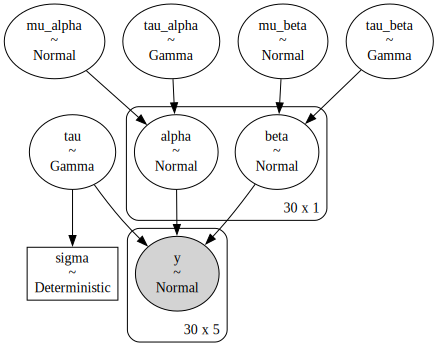

In [5]:
pm.model_to_graphviz(model=m)

In [6]:
%load_ext watermark
%watermark -n -u -v -iv -p pytensor

Last updated: Wed Mar 22 2023

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.9.0

pytensor: 2.10.1

arviz: 0.14.0
numpy: 1.24.2
pymc : 5.1.2

